**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Juan José Ponce Estrada

*   MATRÍCULA: A01659811

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA/credit_risk_dataset.csv")

# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [22]:
# Resumen de los tipos de datos en el dataframe
df.info()

# Número de columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).shape[1]

# Número de columnas cualitativas
cat_cols = df.select_dtypes(include=['object']).shape[1]

print(f"El número de columnas numéricas es: {num_cols}")
print(f"El número de columnas cualitativas es: {cat_cols}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
El número de columnas numéricas

 2. Determina el porcentaje de valores faltantes por columna.

In [38]:
# Porcentaje de valores faltantes por columna
missing_percentage = df.isnull().mean() * 100

missing_percentage

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

In [40]:
# Filtrar columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Estadísticas descriptivas para todas las variables
numeric_stats = numeric_df.describe().T

# Tendencia central: Media y mediana
mean_values = numeric_df.mean()
median_values = numeric_df.median()

# Dispersión o variabilidad: Min, Max, Desviación Estándar, Cuartiles
std_values = numeric_df.std()
quartiles = numeric_df.quantile([0.25, 0.5, 0.75])

# Forma: Asimetría y curtosis
skewness = numeric_df.skew()
kurtosis = numeric_df.kurt()

# Mostrar resultados
print("Estadísticas descriptivas para variables numéricas:")
print(numeric_stats)

print("\nMedia de las variables numéricas:")
print(mean_values)

print("\nMediana de las variables numéricas:")
print(median_values)

print("\nDesviación estándar de las variables numéricas:")
print(std_values)

print("\nCuartiles de las variables numéricas:")
print(quartiles)

print("\nAsimetría de las variables numéricas:")
print(skewness)

print("\nCurtosis de las variables numéricas:")
print(kurtosis)

# Clasificación de person_age y loan_int_rate según asimetría y curtosis
person_age_skewness = skewness['person_age']
person_age_kurtosis = kurtosis['person_age']
loan_int_rate_skewness = skewness['loan_int_rate']
loan_int_rate_kurtosis = kurtosis['loan_int_rate']

print(f"\nClasificación de person_age según la asimetría ({person_age_skewness}) y curtosis ({person_age_kurtosis}):")
if abs(person_age_skewness) < 0.5:
    print("Person_age tiene una distribución aproximadamente simétrica.")
elif person_age_skewness > 0.5:
    print("Person_age tiene asimetría positiva (sesgo a la derecha).")
else:
    print("Person_age tiene asimetría negativa (sesgo a la izquierda).")

if person_age_kurtosis < 0:
    print("Person_age tiene una distribución más plana que la normal.")
else:
    print("Person_age tiene una distribución más apuntada que la normal.")

print(f"\nClasificación de loan_int_rate según la asimetría ({loan_int_rate_skewness}) y curtosis ({loan_int_rate_kurtosis}):")
if abs(loan_int_rate_skewness) < 0.5:
    print("Loan_int_rate tiene una distribución aproximadamente simétrica.")
elif loan_int_rate_skewness > 0.5:
    print("Loan_int_rate tiene asimetría positiva (sesgo a la derecha).")
else:
    print("Loan_int_rate tiene asimetría negativa (sesgo a la izquierda).")

if loan_int_rate_kurtosis < 0:
    print("Loan_int_rate tiene una distribución más plana que la normal.")
else:
    print("Loan_int_rate tiene una distribución más apuntada que la normal.")

Estadísticas descriptivas para variables numéricas:
                              count          mean           std      min  \
person_age                  32581.0     27.734600      6.348078    20.00   
person_income               32581.0  66074.848470  61983.119168  4000.00   
person_emp_length           31686.0      4.789686      4.142630     0.00   
loan_amnt                   32581.0   9589.371106   6322.086646   500.00   
loan_int_rate               29465.0     11.011695      3.240459     5.42   
loan_status                 32581.0      0.218164      0.413006     0.00   
loan_percent_income         32581.0      0.170203      0.106782     0.00   
cb_person_cred_hist_length  32581.0      5.804211      4.055001     2.00   

                                 25%       50%       75%         max  
person_age                     23.00     26.00     30.00      144.00  
person_income               38500.00  55000.00  79200.00  6000000.00  
person_emp_length               2.00      4.00    

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

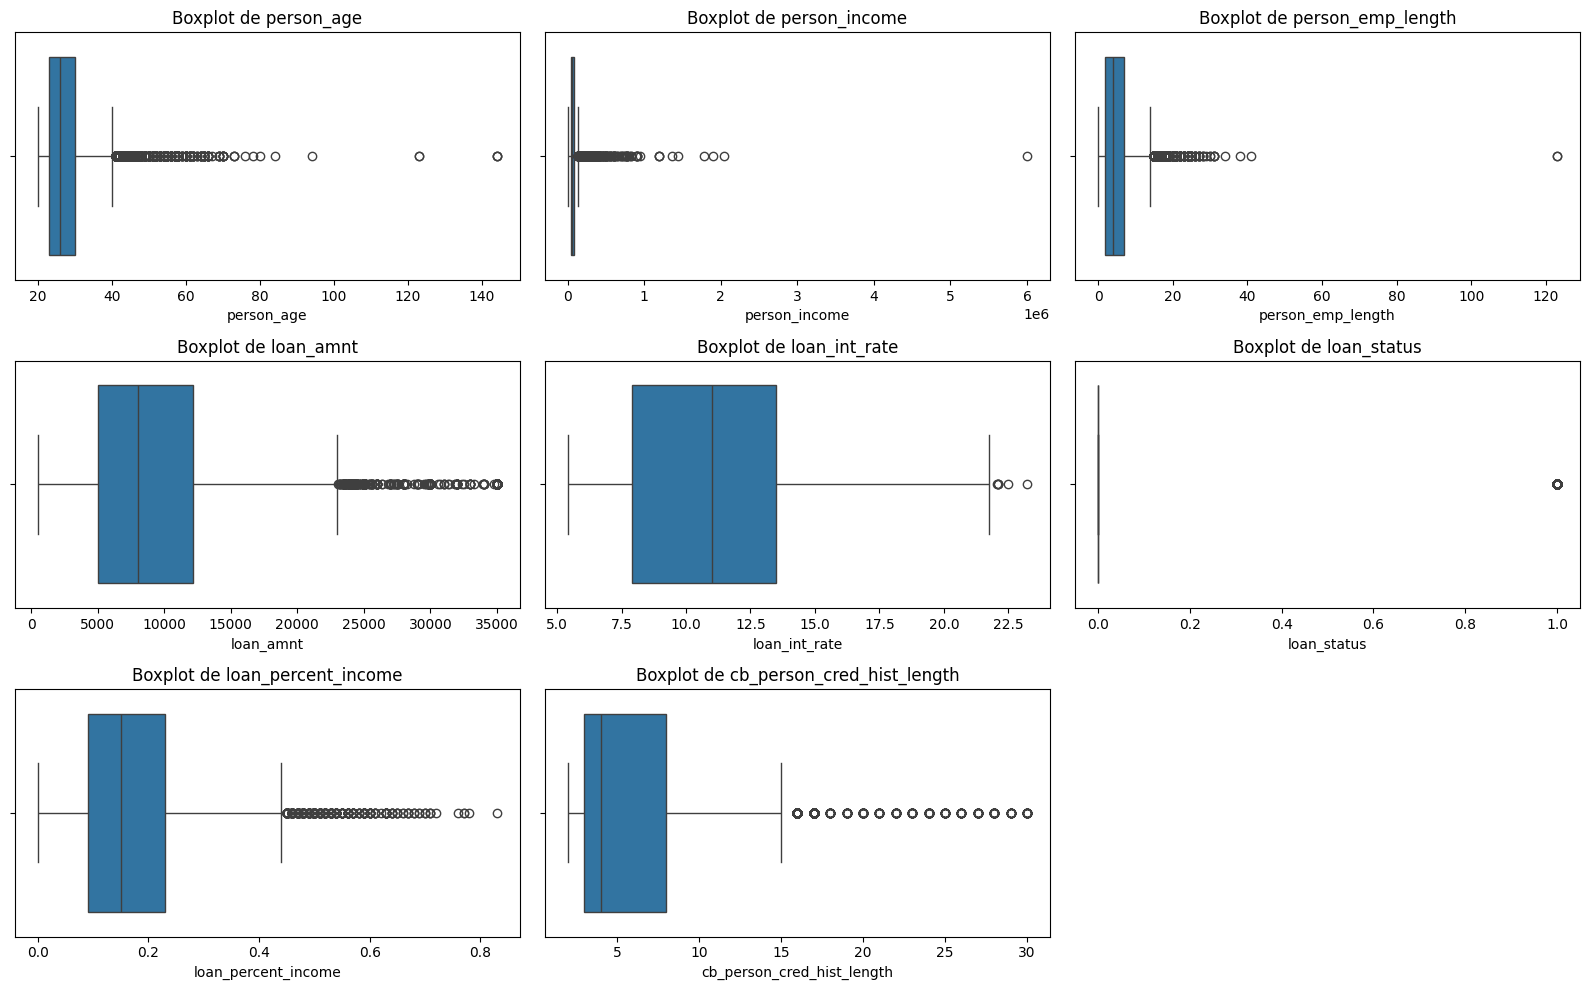

In [39]:
# Crear un boxplot para cada variable numérica
plt.figure(figsize=(16, 10))

numeric_columns = df.select_dtypes(include=[np.number]).columns

# Crear un boxplot para cada columna
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot de {column}")

# Mostrar los gráficos
plt.tight_layout()
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [29]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [30]:
# Seleccionar solo las columnas de texto
text_columns = df.select_dtypes(include=['object'])

# Crear un diccionario para guardar los resultados
text_stats = {}

for column in text_columns.columns:
    # Moda
    mode_value = text_columns[column].mode()[0]

    # Cardinalidad
    cardinality = text_columns[column].nunique()

    # Recuentos únicos
    value_counts = text_columns[column].value_counts()

    # Guardar los resultados en el diccionario
    text_stats[column] = {
        "Moda": mode_value,
        "Cardinalidad": cardinality,
        "Recuentos únicos": value_counts
    }

# Mostrar resultados
for column, stats in text_stats.items():
    print(f"\nEstadísticas descriptivas para la columna '{column}':")
    print(f"Moda: {stats['Moda']}")
    print(f"Cardinalidad (valores únicos): {stats['Cardinalidad']}")
    print(f"Recuentos únicos:\n{stats['Recuentos únicos']}")


Estadísticas descriptivas para la columna 'person_home_ownership':
Moda: RENT
Cardinalidad (valores únicos): 4
Recuentos únicos:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

Estadísticas descriptivas para la columna 'loan_intent':
Moda: EDUCATION
Cardinalidad (valores únicos): 6
Recuentos únicos:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Estadísticas descriptivas para la columna 'loan_grade':
Moda: A
Cardinalidad (valores únicos): 7
Recuentos únicos:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

Estadísticas descriptivas para la columna 'cb_person_default_on_file':
Moda: N
Cardinalidad (valores únicos): 2
Recuentos únicos:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: in

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

<ipython-input-31-33fe39e447b9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], order=df[column].value_counts().index, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

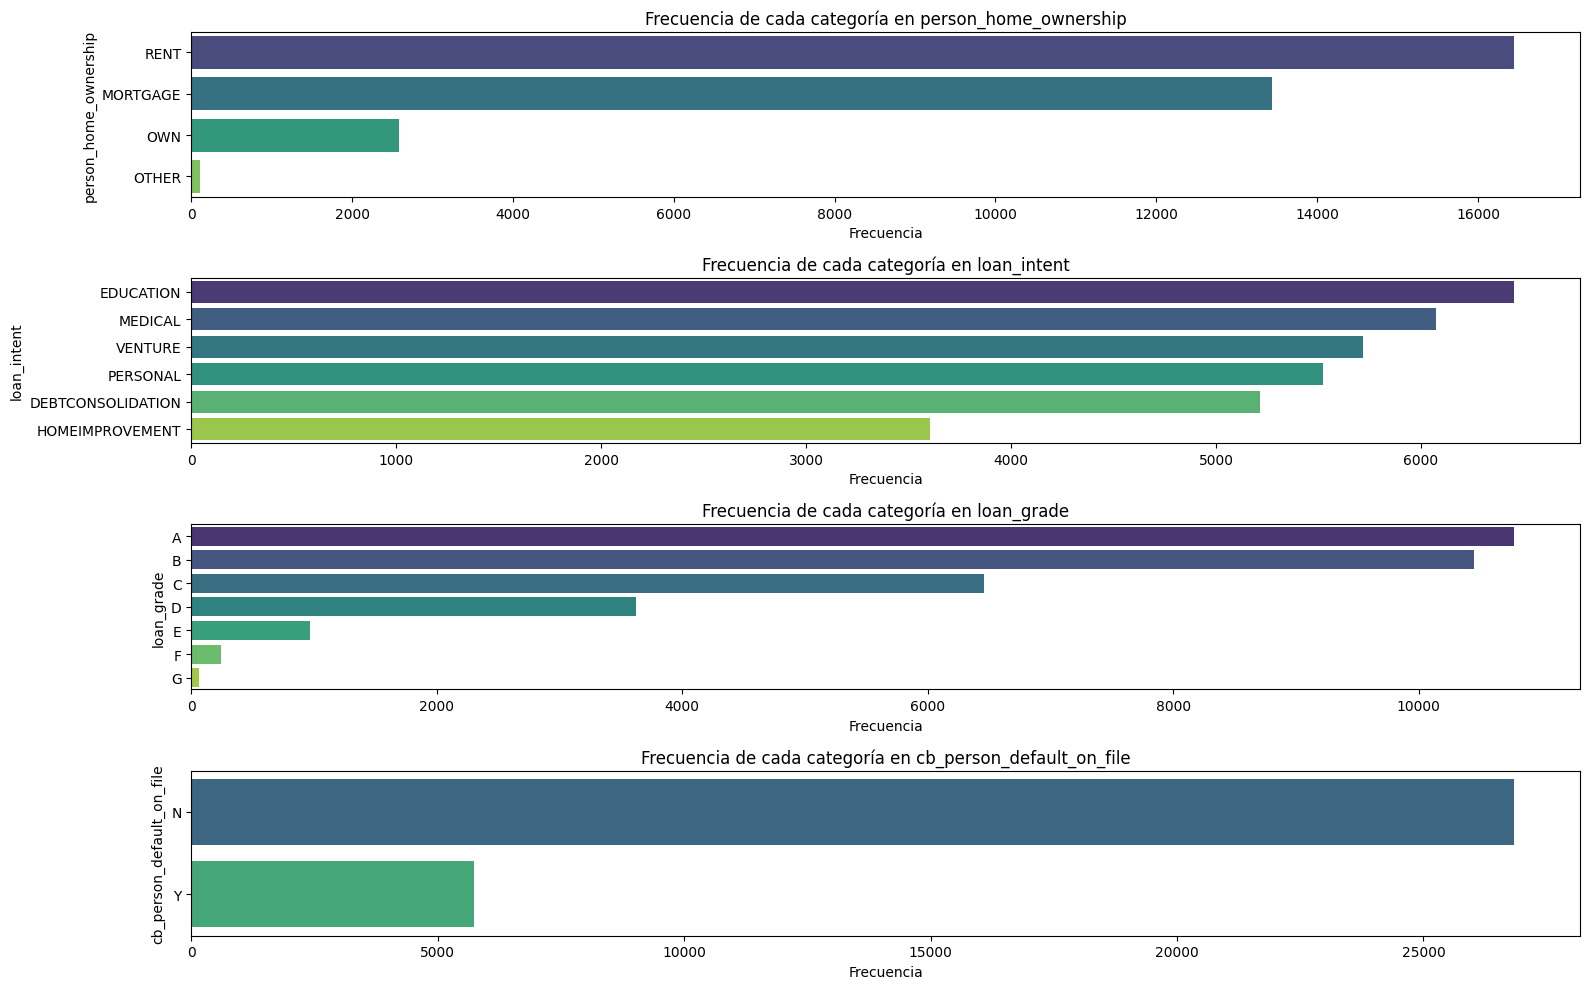

In [31]:
# Importar las libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas de texto
text_columns = df.select_dtypes(include=['object']).columns

# Crear un gráfico de barras para cada variable de texto
plt.figure(figsize=(16, 10))

# Iterar sobre cada columna de texto y crear un gráfico de barras
for i, column in enumerate(text_columns, 1):
    plt.subplot(len(text_columns), 1, i)  # Organizar los gráficos verticalmente
    sns.countplot(y=df[column], order=df[column].value_counts().index, palette="viridis")
    plt.title(f"Frecuencia de cada categoría en {column}")
    plt.xlabel("Frecuencia")
    plt.ylabel(column)

# Ajustar el diseño para evitar amontonamiento
plt.tight_layout()
plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


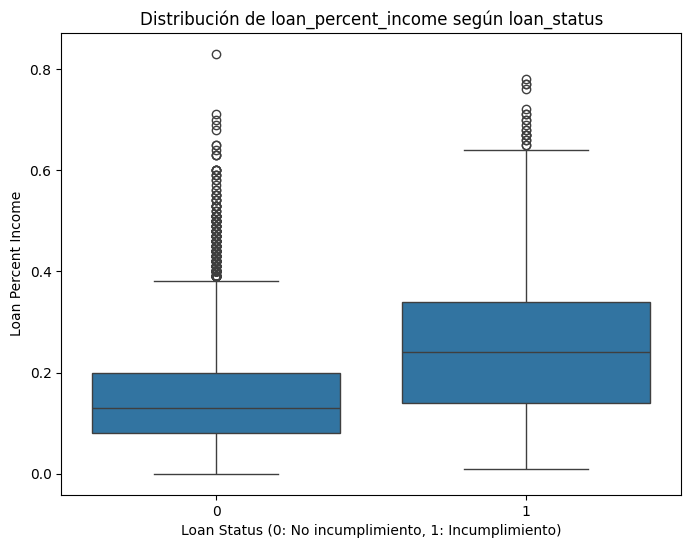

In [33]:
# Crear un boxplot para visualizar la distribución de loan_percent_income según loan_status
plt.figure(figsize=(8, 6))

sns.boxplot(x='loan_status', y='loan_percent_income', data=df)

plt.title('Distribución de loan_percent_income según loan_status')
plt.xlabel('Loan Status (0: No incumplimiento, 1: Incumplimiento)')
plt.ylabel('Loan Percent Income')
plt.show()

#El loan_percent_income es más alto en promedio para aquellos que incumplen, lo que sugiere que cuanto mayor es la proporción de los ingresos que se destina al pago de un préstamo, mayor es la probabilidad de incumplimiento.

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

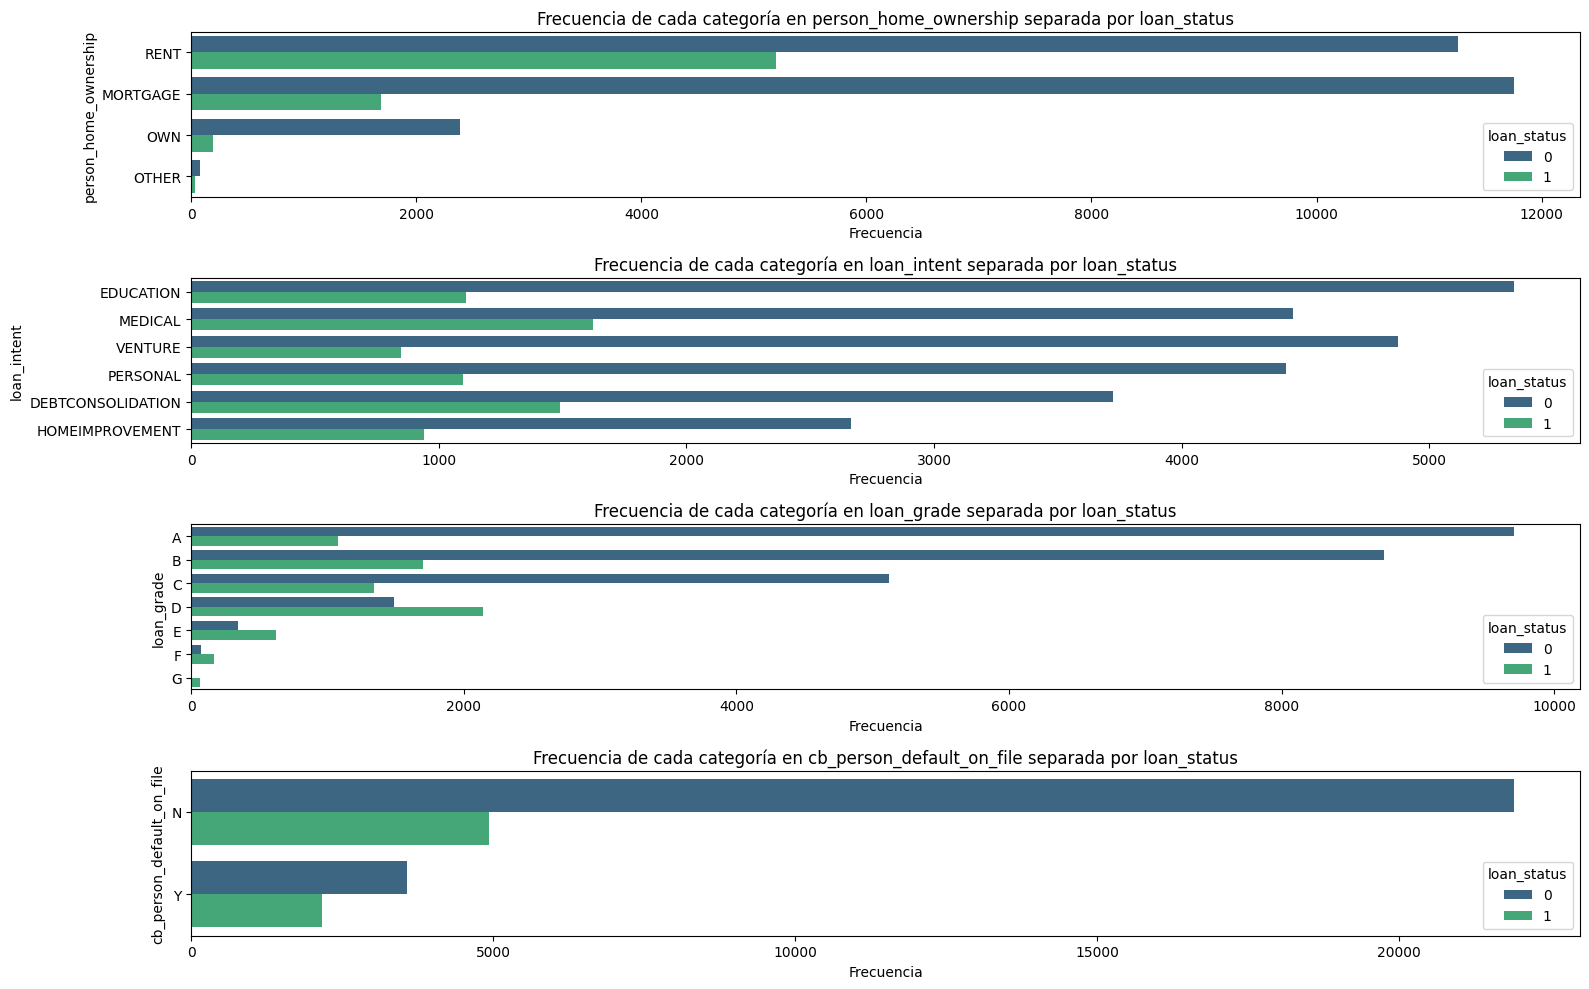

In [41]:

plt.figure(figsize=(16, 10))

# Iterar sobre cada columna de texto y crear un gráfico de barras con el parámetro hue
for i, column in enumerate(text_columns, 1):
    plt.subplot(len(text_columns), 1, i)  # Organizar los gráficos verticalmente
    sns.countplot(y=df[column], hue=df['loan_status'], order=df[column].value_counts().index, palette="viridis")
    plt.title(f"Frecuencia de cada categoría en {column} separada por loan_status")
    plt.xlabel("Frecuencia")
    plt.ylabel(column)

# Ajustar el diseño para evitar amontonamiento
plt.tight_layout()
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

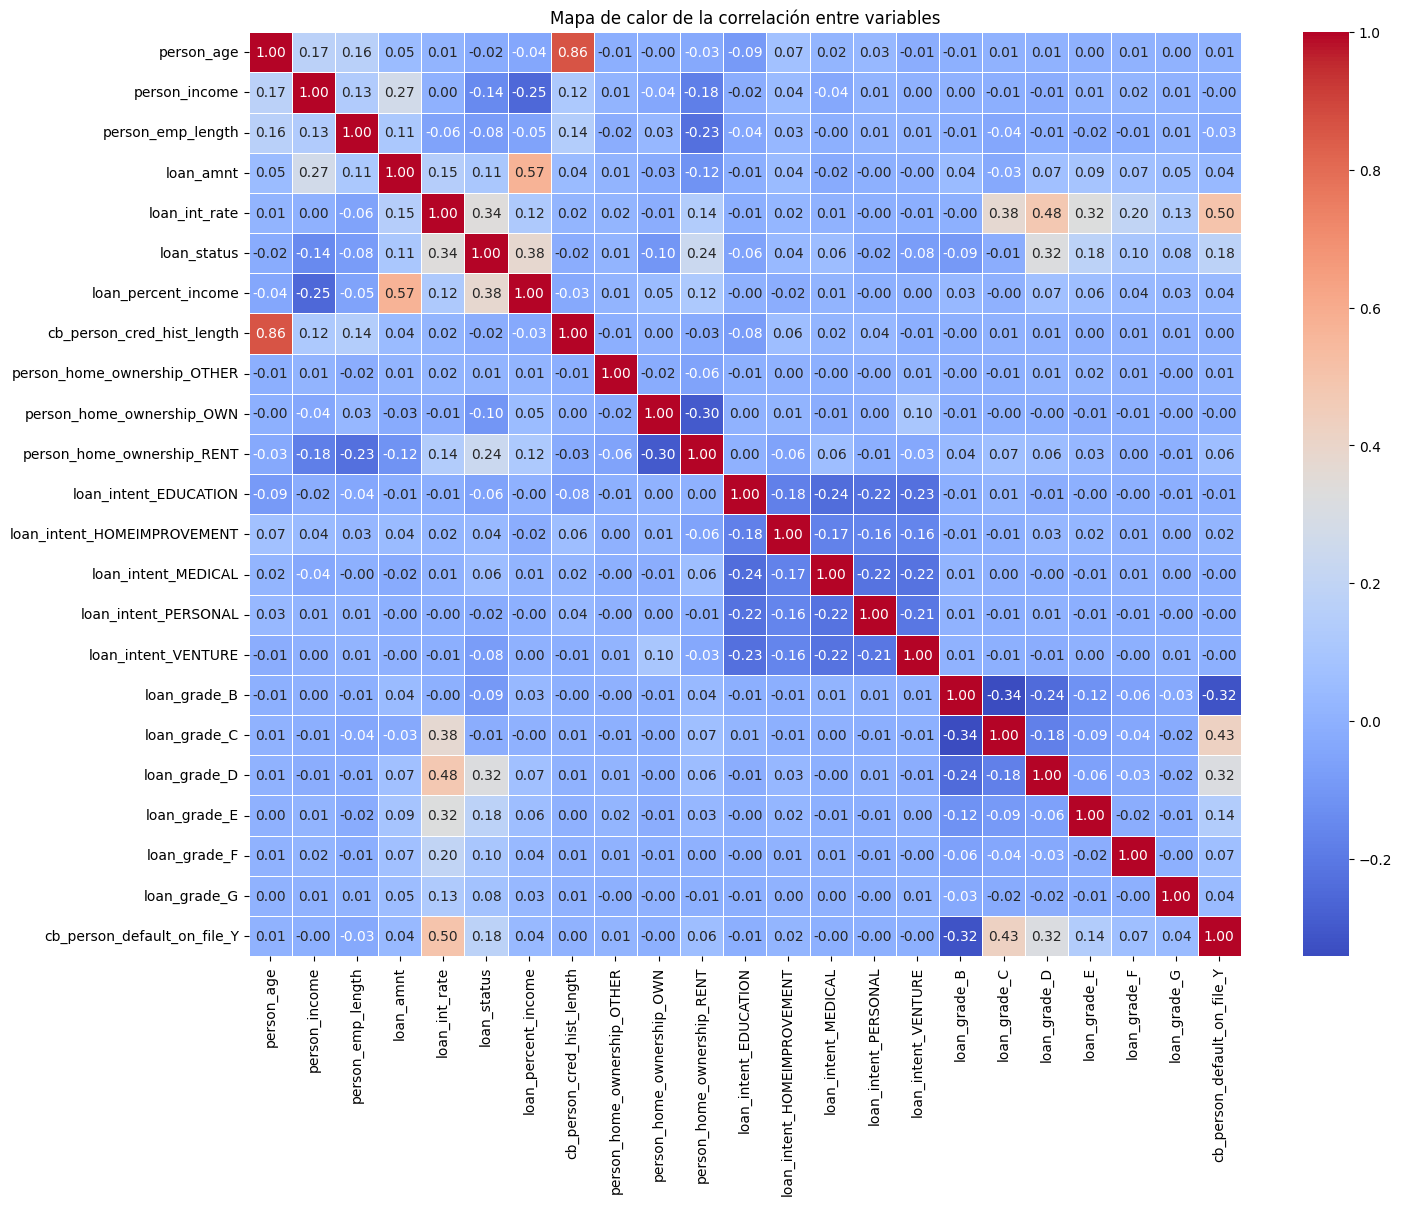

Correlación de loan_status con otras variables:
loan_status                    1.000000
loan_percent_income            0.379366
loan_int_rate                  0.335133
loan_grade_D                   0.318998
person_home_ownership_RENT     0.238430
loan_grade_E                   0.180122
cb_person_default_on_file_Y    0.179141
loan_amnt                      0.105376
loan_grade_F                   0.101841
loan_grade_G                   0.082306
loan_intent_MEDICAL            0.056595
loan_intent_HOMEIMPROVEMENT    0.036607
person_home_ownership_OTHER    0.012543
loan_grade_C                  -0.013031
cb_person_cred_hist_length    -0.015529
loan_intent_PERSONAL          -0.021094
person_age                    -0.021629
loan_intent_EDUCATION         -0.055348
loan_intent_VENTURE           -0.078274
person_emp_length             -0.082489
loan_grade_B                  -0.092190
person_home_ownership_OWN     -0.101960
person_income                 -0.144449
Name: loan_status, dtype: float6

In [37]:

# Convertir las variables categóricas a variables numéricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crear el mapa de calor usando Seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de la correlación entre variables')
plt.show()

# Encontrar la variable con mayor correlación con loan_status
loan_status_corr = correlation_matrix["loan_status"].sort_values(ascending=False)

print("Correlación de loan_status con otras variables:")
print(loan_status_corr)

# La variable con mayor correlación con loan_status (después de sí misma)
highest_corr_variable = loan_status_corr.index[1]  # El índice 0 es loan_status mismo
highest_corr_value = loan_status_corr.iloc[1]

print(f"\nLa variable con mayor correlación con loan_status es: {highest_corr_variable}, con un valor de correlación de {highest_corr_value:.2f}")